****Predicting Student Placement Outcomes Using Academic and Experiential Data****

**Project Description**
The objective of this project is to analyze and predict the employability of students based on various academic, demographic, and experiential factors. The dataset comprises details about students' secondary and higher secondary education, undergraduate degrees, work experience, and MBA performance. By examining these attributes, the project aims to determine which factors significantly influence the likelihood of securing a job and to predict potential salary ranges for students based on their profiles.

**Dataset Description**
The dataset consists of the following columns:
    
**sl_no:** Serial number, a unique identifier for each student.
    
**gender:** Gender of the student (e.g., 'M' for male, 'F' for female).
    
**ssc_p:** Secondary Education percentage (10th Grade) - the overall marks obtained in secondary school.
    
**ssc_b:** Board of Education for secondary school (e.g., 'Central' for central board, 'Others' for other boards).
    
**hsc_p:** Higher Secondary Education percentage (12th Grade) - the overall marks obtained in higher secondary school.
    
**hsc_b:** Board of Education for higher secondary school (e.g., 'Central' for central board, 'Others' for other boards).
    
**hsc_s:** Specialization in Higher Secondary Education (e.g., 'Science', 'Commerce', 'Arts').
    
**degree_p:** Degree percentage - the overall marks obtained in the undergraduate degree.
    
**degree_t:** Type of undergraduate degree (e.g., 'Sci&Tech' for Science and Technology, 'Comm&Mgmt' for Commerce and Management, 'Others').
    
**workex:** Work experience (e.g., 'Yes' if the student has work experience, 'No' otherwise).
    
**etest_p:** E-test percentage - a score from an employability test.
    
**specialisation:** MBA specialization (e.g., 'Mkt&Fin' for Marketing and Finance, 'Mkt&HR' for Marketing and Human Resources).
    
**mba_p:** MBA percentage - the overall marks obtained in the MBA program.
    
**status:** Employment status (e.g., 'Placed' if the student has been placed in a job, 'Not Placed' otherwise).
    
**salary:** Salary offered to the student (applicable only if the student is placed).

In [1]:
# Importing necessary libraries
import numpy as np               # For numerical computing
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization

In [2]:
# Reading the data from a CSV file
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
# Retrieving the columns from the data
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
# Displaying the first five rows of the  data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
# Displaying the last few rows of the data
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [6]:
# Retrieving the dimensions of the data (number of rows and columns)
df.shape

(215, 15)

In [8]:
# Displaying concise summary information about the placement data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
# Generating descriptive statistics for the placements data and transposing the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [10]:
# Iterate through each column in the DataFrame and print the unique values for each column.
for i in df.columns:
  print(df[i].unique())


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
['M' 'F']
[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79.   69.8  77.4  76.

In [11]:
# Removing the Irrelrevent columns like sl_no. and salary
df.drop(["sl_no","salary"],axis=1,inplace=True)

**Exploratory Data Analysis**

In [14]:
# Checking with null values
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [15]:
# Checking for the duplicates in the data
df.duplicated().sum()

0

as there is very insignificant influence of outliers in the Tree based algorithms, we can skip the outlier removal part

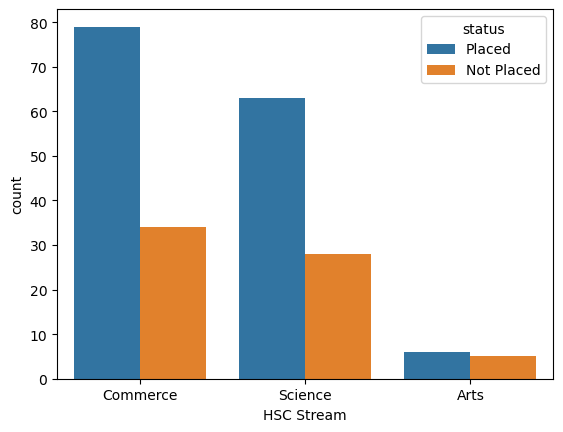

In [16]:
# Creating a count plot to visualize the number of students in each Higher Secondary Education (HSC) stream,
sns.countplot(data=df,x="hsc_s",hue="status")
plt.xlabel("HSC Stream")
plt.show()

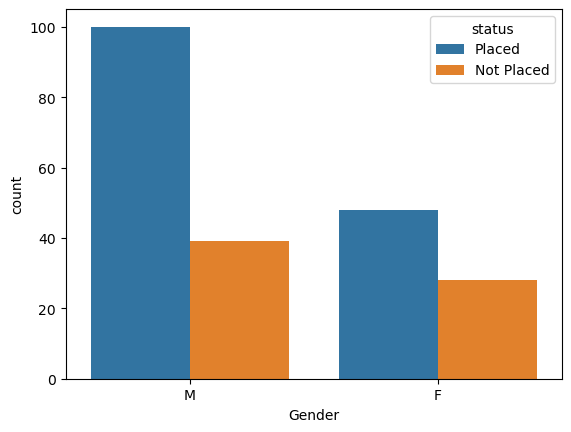

In [17]:
# Create a count plot to visualize the number of students of each gender,
sns.countplot(data=df,x="gender",hue="status")
plt.xlabel("Gender")
plt.show()

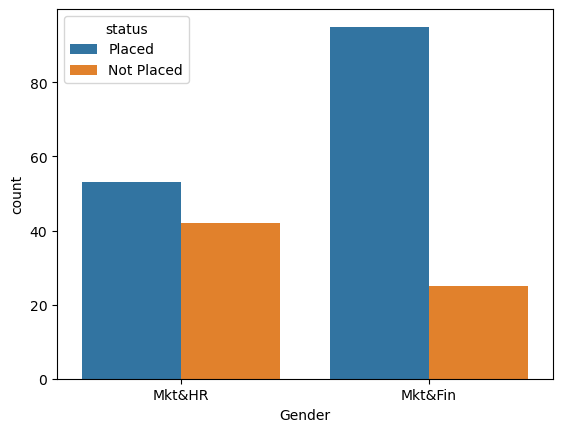

In [18]:
# Create a count plot to visualize the number of students in each MBA specialization.
sns.countplot(data=df,x="specialisation",hue="status")
plt.xlabel("Gender")
plt.show()

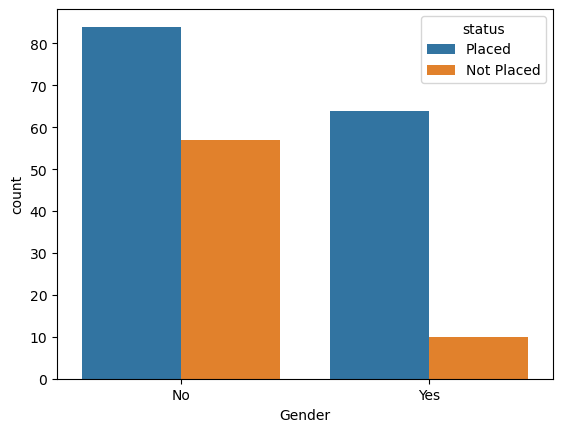

In [19]:
# Create a count plot to visualize the number of students with and without work experience
sns.countplot(data=df,x="workex",hue="status")
plt.xlabel("Gender")
plt.show()

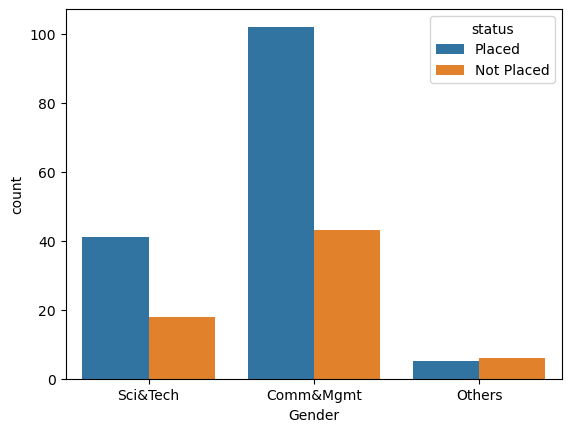

In [20]:
# Create a count plot to visualize the number of students in each type of undergraduate degree
sns.countplot(data=df,x="degree_t",hue="status")
plt.xlabel("Gender")
plt.show()

**Label Encoding**
-Label encoding is a technique in machine learning used to convert categorical data into numerical format, facilitating better understanding by the model.

In [21]:
# Importing the LabelEncoder function from the scikit-learn library for categorical data encoding.
from sklearn.preprocessing import LabelEncoder

In [22]:
# Creating a LabelEncoder instance to convert categorical features into numerical format.
le=LabelEncoder()

# Transforming the categorical feature into numerical format using LabelEncoder.
for i in df.columns:
  if df[i].dtype=="object":
    df[i]=le.fit_transform(df[i])

**Model Building**

In [23]:
# Extracting input features (X) by selecting all columns except the last one (target variable).
x = df.iloc[:, :-1]

# Extracting the target variable (y), which is the "status" column.
y = df["status"]


In [24]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [25]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

In [27]:
# Importing the train_test_split function from scikit-learn for splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets, with 70% of the data used for training and 30% for testing.
# The random_state parameter ensures reproducibility of results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=67)


In [28]:
x_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
72,1,84.86,1,67.00,1,2,78.00,0,0,95.50,0,68.53
175,1,63.00,1,62.00,1,2,65.00,2,0,87.50,1,60.69
211,1,58.00,1,60.00,1,2,72.00,2,0,74.00,0,53.62
145,1,89.40,1,65.66,1,2,71.25,2,0,72.00,1,63.23
140,1,65.00,0,64.80,1,1,69.50,0,1,56.00,0,56.94
...,...,...,...,...,...,...,...,...,...,...,...,...
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14
197,0,83.96,1,53.00,1,2,91.00,2,0,59.32,1,69.71
202,1,70.00,0,63.00,0,2,66.00,2,0,61.28,1,60.11
53,1,80.00,1,70.00,1,2,72.00,2,0,87.00,1,71.04


In [29]:
y_train

72     1
175    0
211    1
145    1
140    1
      ..
7      1
197    1
202    1
53     1
67     1
Name: status, Length: 150, dtype: int32

In [30]:
x_test

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
188,1,61.8,1,47.0,1,1,54.38,0,0,57.0,0,56.13
27,1,63.0,1,67.0,1,1,66.00,0,0,68.0,1,57.69
128,1,80.4,0,73.4,0,2,77.72,2,1,81.2,1,76.26
30,0,64.0,0,73.5,0,1,73.00,0,0,52.0,1,56.70
76,0,66.5,1,70.4,0,0,71.93,0,0,61.0,0,64.27
...,...,...,...,...,...,...,...,...,...,...,...,...
50,0,75.2,0,73.2,0,2,68.40,0,0,65.0,1,62.98
131,0,74.9,1,57.0,1,2,62.00,1,1,80.0,0,60.78
158,1,67.0,1,63.0,1,2,64.00,2,0,60.0,0,61.87
24,1,76.5,1,97.7,1,2,78.86,2,0,97.4,0,74.01


In [31]:
y_test

188    0
27     1
128    1
30     1
76     1
      ..
50     1
131    1
158    0
24     1
11     1
Name: status, Length: 65, dtype: int32

In [32]:
# Importing the DecisionTreeClassifier class from scikit-learn for building decision tree models.
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=2)

In [33]:
# Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [34]:
# Predict the target labels for the testing data using the trained decision tree model
dt_pred = dt_model.predict(x_test)

# Display the predicted labels
dt_pred


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [35]:
# Importing all functions and classes from the sklearn.metrics module for model evaluation.
from sklearn.metrics import *

# Calculate the accuracy score of the decision tree model predictions compared to the actual target labels
accuracy = accuracy_score(y_test, dt_pred) * 100

accuracy


70.76923076923077

**Hyper Parameter Tuning**

In [37]:

# Defining a list of values for the maximum depth parameter of the decision tree model.
depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [38]:
# This code segment trains multiple decision tree models with varying depths and evaluates their performance 
for i in depth:
  model=DecisionTreeClassifier(random_state=34,max_depth=i)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  print("the depth of Tree is",i,"and the accuracy is",accuracy_score(y_test,pred))

the depth of Tree is 2 and the accuracy is 0.7846153846153846
the depth of Tree is 3 and the accuracy is 0.7384615384615385
the depth of Tree is 4 and the accuracy is 0.6923076923076923
the depth of Tree is 5 and the accuracy is 0.7230769230769231
the depth of Tree is 6 and the accuracy is 0.7230769230769231
the depth of Tree is 7 and the accuracy is 0.7230769230769231
the depth of Tree is 8 and the accuracy is 0.7230769230769231
the depth of Tree is 9 and the accuracy is 0.7230769230769231
the depth of Tree is 10 and the accuracy is 0.7230769230769231
the depth of Tree is 11 and the accuracy is 0.7230769230769231
the depth of Tree is 12 and the accuracy is 0.7230769230769231
the depth of Tree is 13 and the accuracy is 0.7230769230769231
the depth of Tree is 14 and the accuracy is 0.7230769230769231
the depth of Tree is 15 and the accuracy is 0.7230769230769231


 We can observe from the above results that a depth of 2 yields the highest accuracy, while deeper trees do not significantly improve performance and may lead to overfitting. Therefore, a depth of 2 may be chosen as the optimal depth for this dataset.

In [39]:
# Computing the confusion matrix to evaluate the classifier's performance.
cm = confusion_matrix(y_test, pred)
cm



array([[12,  9],
       [ 9, 35]], dtype=int64)

<Axes: >

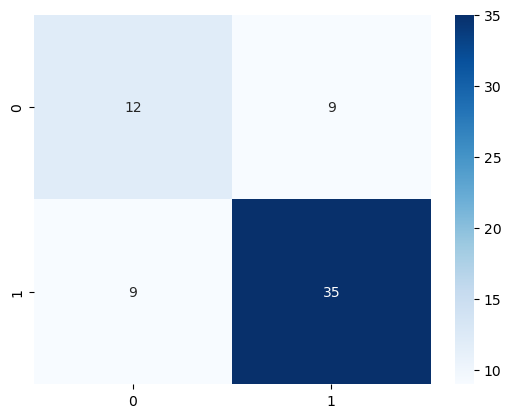

In [40]:
# Visualize the confusion matrix using a heatmap with annotations for better clarity.
sns.heatmap(cm, cmap="Blues", annot=True)


In [41]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, pred)

# Display the classification report
print(report)


              precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.80      0.80      0.80        44

    accuracy                           0.72        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.72      0.72      0.72        65



**Overall Accuracy**: 72%

**Class 0 (Not Placed):**

**Precision:** 57% - Correctly identified not placed instances out of total predicted not placed.
    
**Recall:** 57% - Correctly identified not placed instances out of actual not placed instances.
    
**F1-Score:** 57% - Balance between precision and recall.
    
**Class 1 (Placed):**

**Precision:** 80% - Correctly identified placed instances out of total predicted placed.
    
**Recall:** 80% - Correctly identified placed instances out of actual placed instances.
    
**F1-Score:** 80% - Balance between precision and recall.
    
**The model performs better at predicting placed students than not placed students, with an overall accuracy of 72%.**